In [27]:
import pandas as pd 
df = pd.read_csv("/Users/lky/Desktop/PAII Project/HeartAttack_Prediction/standard_heartrate.csv")
X = df.drop("Heart Attack Risk", axis = 1)
y = df["Heart Attack Risk"]

In [28]:
X.drop("Unnamed: 0", axis = 1, inplace = True)
X.Sex =(X.Sex == "Male")

## This is for train test split

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
# Applying SMOTE
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [38]:
y_train.value_counts()

Heart Attack Risk
0    4499
1    2511
Name: count, dtype: int64

In [37]:
#the dataset now becomes balanced
y_train_resampled.value_counts()

Heart Attack Risk
0    4499
1    4499
Name: count, dtype: int64

## Logistics Regression

[[926 199]
 [515 113]]


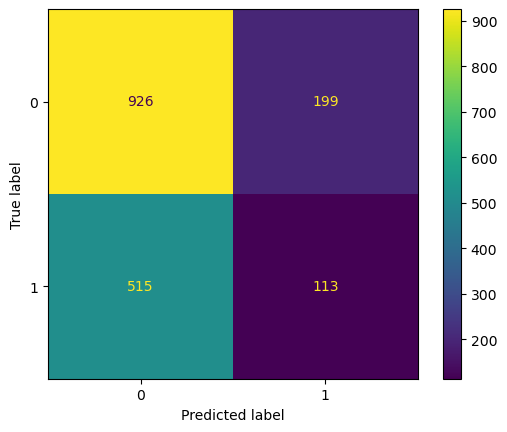

In [47]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report, accuracy_score
import warnings
warnings.filterwarnings('ignore')

# Initialize the logistic regression model
logreg = LogisticRegression(max_iter=1000)

# Fit the model on the training data
logreg.fit(X_train_resampled, y_train_resampled)

# Perform predictions on the test set
y_pred = logreg.predict(X_test)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print(cm)

# For a nicer display
ConfusionMatrixDisplay(cm).plot()
import matplotlib.pyplot as plt
plt.show()

In [49]:
# Evaluate the model
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.64      0.82      0.72      1125
           1       0.36      0.18      0.24       628

    accuracy                           0.59      1753
   macro avg       0.50      0.50      0.48      1753
weighted avg       0.54      0.59      0.55      1753

Accuracy: 0.5926982316029663


## Fine tuning

In [50]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['newton-cg', 'lbfgs', 'liblinear']
}

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=LogisticRegression(max_iter=1000), param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the grid search to the data
grid_search.fit(X_train_resampled, y_train_resampled)

# Extract the best parameters and score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

best_params, best_score

({'C': 100, 'solver': 'newton-cg'}, 0.6331767031066642)

## Model Evaluation of Logistics Regression after Fine-tuning

[[948 177]
 [530  98]]


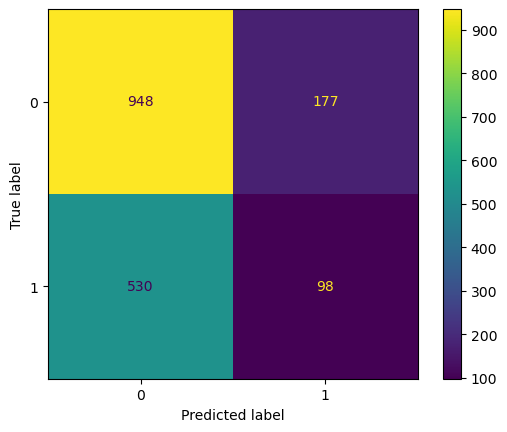

In [51]:
optimized_logreg = LogisticRegression(C=100, solver='newton-cg', max_iter=1000)
optimized_logreg.fit(X_train_resampled, y_train_resampled)

optimized_y_pred = optimized_logreg.predict(X_test)

# Calculate confusion matrix
cm = confusion_matrix(y_test, optimized_y_pred)

# Print the confusion matrix
print(cm)

# For a nicer display
ConfusionMatrixDisplay(cm).plot()
import matplotlib.pyplot as plt
plt.show()

In [54]:
# Evaluate the model
print(classification_report(y_test, optimized_y_pred))
print("Accuracy:", accuracy_score(y_test, optimized_y_pred))

              precision    recall  f1-score   support

           0       0.64      0.84      0.73      1125
           1       0.36      0.16      0.22       628

    accuracy                           0.60      1753
   macro avg       0.50      0.50      0.47      1753
weighted avg       0.54      0.60      0.55      1753

Accuracy: 0.5966913861950941
